# Environmental Impact of Power Plants
## Overview

This notebook demonstrates how to calculate greenhouse gas (GHG) emissions from power plants using the **IBM Environmental Intelligence: Greenhouse Gas (GHG) Emissions - Stationary Emission API**. In the energy sector, emissions can vary significantly depending on the type of fuel used and the energy content associated with that fuel. The API allows us to calculate emissions based on the fuel type and fuel consumption amount.

The primary focus of this notebook is calculating emissions for different fuel types (e.g., coal, natural gas, oil) based on a given energy consumption using the **Stationary Emission API**.

Through this example, you will learn how to:
- Input specific fuel data and energy content for various fuels.
- Retrieve and analyze emissions data based on the given energy content.
- Understand the impact of different fuels on overall GHG emissions in the power sector.

By leveraging these calculations, organizations can make data-driven decisions about fuel choices and their corresponding environmental impact, contributing to more sustainable energy generation.

Refer the [GHG Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API) for more details on the Stationary GHG Emissions API Endpoint inputs and the output data points.


![Alt text](power_plant.png "Power Plant")

## Setup

Make sure you have Python installed in your system (python 3+ is recommended).


<b>Note:</b> To run this notebook seamlessly, you have to first configure your GHG Emission APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your GHG APIs API key>
api.client_id = <Your GHG APIs client Id>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../../auth/secrets.ini')```

In [106]:
# Install below packages using pip/pip3 based on your python version.
# pip install pandas,configparser,json,IPython
import pandas as pd
import configparser
import requests
import json
from IPython.display import display as display_summary
import matplotlib.pyplot as plt

### Get token


Run the code snippet below to generate the Auth Bearer Token using your api_key configured in secrets.ini.

In [107]:
config = configparser.RawConfigParser()
config.read(['../../../auth/secrets.ini','../../../auth/config.ini'])

EI_API_KEY  = config.get('EI', 'api.api_key')
EI_CLIENT_ID = config.get('EI', 'api.client_id')
EI_AUTH_ENPOINT = config.get('EI', 'api.auth_endpoint')
EI_BASE_URL = config.get('EI', 'api.base_url')

def get_bearer_token(token):
    headers = {
        'Content-Type': 'application/json',
        'cache-control': 'no-cache',
    }
    data = {"apiKey":token, "clientId":EI_CLIENT_ID}
    bearer_token_req = requests.post(EI_AUTH_ENPOINT, headers=headers, data= json.dumps(data))
    if bearer_token_req.status_code != 200:
        print( "Error in getting Bearer token. Error code : ",bearer_token_req.status_code)
    return bearer_token_req.json()['access_token']

mybearer_token = get_bearer_token(EI_API_KEY)

## Utility Functions

Let us setup utility helper functions to execute this usecase

### Function to call API

In [108]:
def call_carbon_api(co2_api, co2_data, token):
    headers = {
        'accept': 'application/json',
        'Authorization': 'Bearer '+token,
        'Content-Type': 'application/json',
    }

    co2_response_req = requests.post( co2_api, headers=headers, data=json.dumps(co2_data))
    if co2_response_req.status_code != 200:
        print( "Problem! Error in generating response. Error code : ",co2_response_req.status_code)
    return co2_response_req.json()

### Input format for API

In [109]:
def customer_id(customer_id):
    Input =  {
              "id": customer_id
          }
    return Input 

def customer_on_behalf_of_client(company_id,company_name):
    Input =  {
              "companyId": company_id,
              "companyName": company_name
          }
    return Input  


def customer_organisation(department_id,department_name):
    Input =  {
              "departmentId": department_id,
              "departmentName": department_name
          }
    return Input  


def customer_request_type(request_type):
    Input =  {
              "requestType": request_type,
             }
    return Input     


def customer_location(country,state_province,zip_post_code,city):
    Input =  {
              "country": country,
              "stateProvince": state_province,
              "zipPostCode": zip_post_code,
              "city": city
          }
    return Input        


def customer_site(site_id,site_name,building_id,building_name):
    Input = {
              "siteId": site_id,
              "siteName": site_name,
              "buildingId": building_id,
              "buildingName": building_name
          }               
    return Input

def stationary_input(sector,fuel_name,fuel_amount,fuel_unit,hv_basis):
    input = {"sector": sector,
             "fuelName": fuel_name,
             "fuelAmount": fuel_amount,
             "fuelUnit": fuel_unit,
             "hvBasis": hv_basis
            }
    return input

## Coal-Fired Power Plant Type

Let us understand the impact of Coal-Fired Power Plant Type on the environment. The Coal-Fired Power Plant uses the fuel as "lignite" with an fuel content of 5 GigaJoules. The output is the measure of all the Greenhouse Gas Emissions.

In [110]:
fuel_type = "lignite"
energy_content = "5" #Giga Joule

In [111]:
request_payload ={'customID'        : customer_id(customer_id='6377709825425408'), 
                   'onBehalfOfClient': customer_on_behalf_of_client(company_id='1687653745426432',
                                                                 company_name='Mike Wright') , 
                   'organisation'    : customer_organisation(department_id='1551140483235840',
                                                             department_name='Cordelia McDaniel'), 
                   'requestType'     : customer_request_type(request_type='ACTUAL'), 
                   'location'        : customer_location(country='Niger',
                                                         state_province='QC',
                                                         zip_post_code='E1G 8B1',
                                                         city='Caposoode'),
                   'site'            : customer_site(site_id='5220563278626816',
                                                     site_name='Johnny Soto',
                                                     building_id='7334540951420928',
                                                     building_name='Grace Ryan'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '1'},
                   'activityData' : stationary_input(sector     = 'Energy', 
                                                        fuel_name   = fuel_type,
                                                        fuel_amount = energy_content,
                                                        fuel_unit   = 'GJ',
                                                        hv_basis    = 'Not applicable')
                   }        
       
print("Requests payload is :",json.dumps(request_payload, indent=2))   

Requests payload is : {
  "customID": {
    "id": "6377709825425408"
  },
  "onBehalfOfClient": {
    "companyId": "1687653745426432",
    "companyName": "Mike Wright"
  },
  "organisation": {
    "departmentId": "1551140483235840",
    "departmentName": "Cordelia McDaniel"
  },
  "requestType": {
    "requestType": "ACTUAL"
  },
  "location": {
    "country": "Niger",
    "stateProvince": "QC",
    "zipPostCode": "E1G 8B1",
    "city": "Caposoode"
  },
  "site": {
    "siteId": "5220563278626816",
    "siteName": "Johnny Soto",
    "buildingId": "7334540951420928",
    "buildingName": "Grace Ryan"
  },
  "timePeriod": {
    "year": "2021",
    "month": "1"
  },
  "activityData": {
    "sector": "Energy",
    "fuelName": "lignite",
    "fuelAmount": "5",
    "fuelUnit": "GJ",
    "hvBasis": "Not applicable"
  }
}


In [112]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/stationary"
co2_response_coal_fired = call_carbon_api(EI_API_ENDPOINT , request_payload, mybearer_token)

df_res = pd.json_normalize(co2_response_coal_fired)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,fossilFuelCO2,biogenicCO2,CH4,N2O,CO2e,unitOfMeasurement,description
0,0.505000,0,0.000005,0.000007,0.507128,metric tonne,"Fuel Analysis Method is used. Emission factors are obtained from 2019 Refinement to the 2006 IPCC Guidelines for National Greenhouse Gas Inventories. GWP values are obtained from IPCC Fifth Assessment Report, 2014 (AR5)"


## Natural Gas-Fired Power Plant Type

In case of Natural Gas-Fired Power Plant Type, the fuel used is "Natural gas" with an fuel content of 5 GigaJoules. The output is the measure of all the Greenhouse Gas Emissions.

In [113]:
fuel_type = "Natural gas"
energy_content = "5" #Giga Joule

In [114]:
request_payload ={'customID'        : customer_id(customer_id='6377709825425408'), 
                   'onBehalfOfClient': customer_on_behalf_of_client(company_id='1687653745426432',
                                                                 company_name='Mike Wright') , 
                   'organisation'    : customer_organisation(department_id='1551140483235840',
                                                             department_name='Cordelia McDaniel'), 
                   'requestType'     : customer_request_type(request_type='ACTUAL'), 
                   'location'        : customer_location(country='Niger',
                                                         state_province='QC',
                                                         zip_post_code='E1G 8B1',
                                                         city='Caposoode'),
                   'site'            : customer_site(site_id='5220563278626816',
                                                     site_name='Johnny Soto',
                                                     building_id='7334540951420928',
                                                     building_name='Grace Ryan'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '1'},
                   'activityData' : stationary_input(sector     = 'Energy', 
                                                        fuel_name   = fuel_type,
                                                        fuel_amount = energy_content,
                                                        fuel_unit   = 'GJ',
                                                        hv_basis    = 'Not applicable')
                   }        
       
print("Requests payload is :",json.dumps(request_payload, indent=2))   

Requests payload is : {
  "customID": {
    "id": "6377709825425408"
  },
  "onBehalfOfClient": {
    "companyId": "1687653745426432",
    "companyName": "Mike Wright"
  },
  "organisation": {
    "departmentId": "1551140483235840",
    "departmentName": "Cordelia McDaniel"
  },
  "requestType": {
    "requestType": "ACTUAL"
  },
  "location": {
    "country": "Niger",
    "stateProvince": "QC",
    "zipPostCode": "E1G 8B1",
    "city": "Caposoode"
  },
  "site": {
    "siteId": "5220563278626816",
    "siteName": "Johnny Soto",
    "buildingId": "7334540951420928",
    "buildingName": "Grace Ryan"
  },
  "timePeriod": {
    "year": "2021",
    "month": "1"
  },
  "activityData": {
    "sector": "Energy",
    "fuelName": "Natural gas",
    "fuelAmount": "5",
    "fuelUnit": "GJ",
    "hvBasis": "Not applicable"
  }
}


In [115]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/stationary"
co2_response_naturalgas_fired = call_carbon_api(EI_API_ENDPOINT , request_payload, mybearer_token)

df_res = pd.json_normalize(co2_response_naturalgas_fired)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,fossilFuelCO2,biogenicCO2,CH4,N2O,CO2e,unitOfMeasurement,description
0,0.280500,0,0.000005,0.000000,0.280772,metric tonne,"Fuel Analysis Method is used. Emission factors are obtained from 2019 Refinement to the 2006 IPCC Guidelines for National Greenhouse Gas Inventories. GWP values are obtained from IPCC Fifth Assessment Report, 2014 (AR5)"


## Oil-Fired Power Plant Type

To measure the impact of Oil-Fired Power Plant Type on the environment, we use the fuel as "crude oil" and the fuel content of 5 GigaJoules. The output again is measurement of Greenhouse Gas Emissions that shows the impact on environment.

In [116]:
fuel_type = "crude oil"
energy_content = "5" #Giga Joule

In [117]:
request_payload ={'customID'        : customer_id(customer_id='6377709825425408'), 
                   'onBehalfOfClient': customer_on_behalf_of_client(company_id='1687653745426432',
                                                                 company_name='Mike Wright') , 
                   'organisation'    : customer_organisation(department_id='1551140483235840',
                                                             department_name='Cordelia McDaniel'), 
                   'requestType'     : customer_request_type(request_type='ACTUAL'), 
                   'location'        : customer_location(country='Niger',
                                                         state_province='QC',
                                                         zip_post_code='E1G 8B1',
                                                         city='Caposoode'),
                   'site'            : customer_site(site_id='5220563278626816',
                                                     site_name='Johnny Soto',
                                                     building_id='7334540951420928',
                                                     building_name='Grace Ryan'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '1'},
                   'activityData' : stationary_input(sector     = 'Energy', 
                                                        fuel_name   = fuel_type,
                                                        fuel_amount = energy_content,
                                                        fuel_unit   = 'GJ',
                                                        hv_basis    = 'Not applicable')
                   }        
       
print("Requests payload is :",json.dumps(request_payload, indent=2))   

Requests payload is : {
  "customID": {
    "id": "6377709825425408"
  },
  "onBehalfOfClient": {
    "companyId": "1687653745426432",
    "companyName": "Mike Wright"
  },
  "organisation": {
    "departmentId": "1551140483235840",
    "departmentName": "Cordelia McDaniel"
  },
  "requestType": {
    "requestType": "ACTUAL"
  },
  "location": {
    "country": "Niger",
    "stateProvince": "QC",
    "zipPostCode": "E1G 8B1",
    "city": "Caposoode"
  },
  "site": {
    "siteId": "5220563278626816",
    "siteName": "Johnny Soto",
    "buildingId": "7334540951420928",
    "buildingName": "Grace Ryan"
  },
  "timePeriod": {
    "year": "2021",
    "month": "1"
  },
  "activityData": {
    "sector": "Energy",
    "fuelName": "crude oil",
    "fuelAmount": "5",
    "fuelUnit": "GJ",
    "hvBasis": "Not applicable"
  }
}


In [118]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/stationary"
co2_response_oil_fired = call_carbon_api(EI_API_ENDPOINT , request_payload, mybearer_token)

df_res = pd.json_normalize(co2_response_oil_fired)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,fossilFuelCO2,biogenicCO2,CH4,N2O,CO2e,unitOfMeasurement,description
0,0.366500,0,0.000015,0.000003,0.367715,metric tonne,"Fuel Analysis Method is used. Emission factors are obtained from 2019 Refinement to the 2006 IPCC Guidelines for National Greenhouse Gas Inventories. GWP values are obtained from IPCC Fifth Assessment Report, 2014 (AR5)"


## Biomass-Fired Power Plant Type

And finally let us evaluate the impact of Biomass-Fired Power Plant Type on the environment by measuring the Greenhouse Gas emissions. This is measured by setting fuel as "Wood or Wood waste" and energy content of 5 GigaJoules.

In [119]:
fuel_type = "Wood or Wood waste"
energy_content = "5" #Giga Joule

In [120]:
request_payload ={'customID'        : customer_id(customer_id='6377709825425408'), 
                   'onBehalfOfClient': customer_on_behalf_of_client(company_id='1687653745426432',
                                                                 company_name='Mike Wright') , 
                   'organisation'    : customer_organisation(department_id='1551140483235840',
                                                             department_name='Cordelia McDaniel'), 
                   'requestType'     : customer_request_type(request_type='ACTUAL'), 
                   'location'        : customer_location(country='Niger',
                                                         state_province='QC',
                                                         zip_post_code='E1G 8B1',
                                                         city='Caposoode'),
                   'site'            : customer_site(site_id='5220563278626816',
                                                     site_name='Johnny Soto',
                                                     building_id='7334540951420928',
                                                     building_name='Grace Ryan'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '1'},
                   'activityData' : stationary_input(sector     = 'Energy', 
                                                        fuel_name   = fuel_type,
                                                        fuel_amount = energy_content,
                                                        fuel_unit   = 'GJ',
                                                        hv_basis    = 'Not applicable')
                   }        
       
print("The request payload is :",json.dumps(request_payload, indent=2))   

The request payload is : {
  "customID": {
    "id": "6377709825425408"
  },
  "onBehalfOfClient": {
    "companyId": "1687653745426432",
    "companyName": "Mike Wright"
  },
  "organisation": {
    "departmentId": "1551140483235840",
    "departmentName": "Cordelia McDaniel"
  },
  "requestType": {
    "requestType": "ACTUAL"
  },
  "location": {
    "country": "Niger",
    "stateProvince": "QC",
    "zipPostCode": "E1G 8B1",
    "city": "Caposoode"
  },
  "site": {
    "siteId": "5220563278626816",
    "siteName": "Johnny Soto",
    "buildingId": "7334540951420928",
    "buildingName": "Grace Ryan"
  },
  "timePeriod": {
    "year": "2021",
    "month": "1"
  },
  "activityData": {
    "sector": "Energy",
    "fuelName": "Wood or Wood waste",
    "fuelAmount": "5",
    "fuelUnit": "GJ",
    "hvBasis": "Not applicable"
  }
}


In [121]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/stationary"
co2_response_biomass_fired = call_carbon_api(EI_API_ENDPOINT , request_payload, mybearer_token)

df_res = pd.json_normalize(co2_response_biomass_fired)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,fossilFuelCO2,biogenicCO2,CH4,N2O,CO2e,unitOfMeasurement,description
0,0,0.560000,0.000150,0.000020,0.009500,metric tonne,"Fuel Analysis Method is used. Emission factors are obtained from 2019 Refinement to the 2006 IPCC Guidelines for National Greenhouse Gas Inventories. GWP values are obtained from IPCC Fifth Assessment Report, 2014 (AR5)"


## Comparison of Emissions Between Power Plant Types

Based on the carbon emissions measured for each of the power plant types, now we will compare the emission levels and analyse the impact on the environment.
For this we will plot a graph of emissions by the power plant types and analyse the results in the graph.

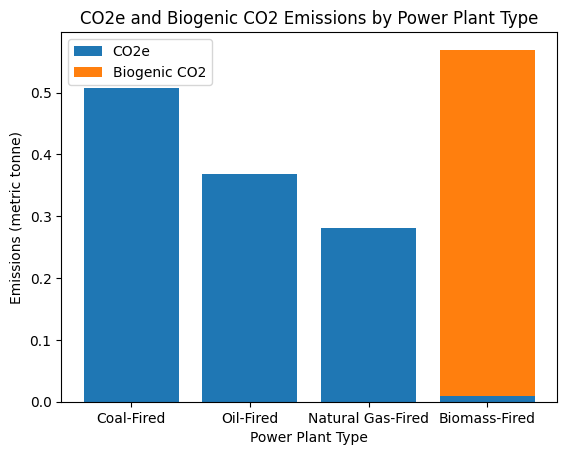

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Coal-Fired', 'Oil-Fired', 'Natural Gas-Fired', 'Biomass-Fired']
co2e = [co2_response_coal_fired['CO2e'], co2_response_oil_fired['CO2e'], co2_response_naturalgas_fired['CO2e'], co2_response_biomass_fired['CO2e']]
biogenic_carbon = [co2_response_coal_fired['biogenicCO2'], co2_response_oil_fired['biogenicCO2'], co2_response_naturalgas_fired['biogenicCO2'], co2_response_biomass_fired['biogenicCO2']]
fig, ax = plt.subplots()

# Stacked Bar Chart
ax.bar(labels, co2e, label='CO2e')
ax.bar(labels, biogenic_carbon, bottom=co2e, label='Biogenic CO2')

ax.set_xlabel('Power Plant Type')
ax.set_ylabel('Emissions (metric tonne)')
ax.set_title('CO2e and Biogenic CO2 Emissions by Power Plant Type')
ax.legend()

plt.show()

The data reveals that for same energy consumption, Coal-Fired power plants have the highest CO2e emissions, followed by Oil-Fired and Natural Gas-Fired plants, with Biomass-Fired plants emitting the least CO2e. In contrast, biogenic carbon, which is CO2 derived from recent biological processes rather than fossil sources, is only significant in Biomass-Fired plants.